In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split as tts
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import seaborn as sns

df1 = pd.read_csv("Week8_train.csv",index_col = False)#link for train data 
#https://drive.google.com/file/d/1hw2eUMq_04gTjK8F8j0ebK_4PFfk1fx2/view?usp=sharing

df2 = pd.read_csv("Week8_test.csv",index_col = False)#link for test data
#https://drive.google.com/file/d/17X8wdPwVpv1fZRlBdwmo7-T8Y755BP6G/view?usp=sharing
print(df1.shape , df2.shape)




(110899, 483) (110899, 482)


In [2]:
ids = df2['id']
df1.drop(['id','PARTY_ID'],axis = 1 , inplace = True)
df2.drop(['id','PARTY_ID'],axis = 1 , inplace = True)

df1


,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,...,V_474,V_475,V_476,V_477,V_478,V_479,V_480,V_481,V_482,TARGET
0,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,1,0,0.000000,0.0,0.0,0
1,0,0,0,0,0,0,0,0,0,110.038907,...,0,0,0,0,0,2,26.010373,0.0,0.0,0
2,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,1,0,2248.357090,0.0,0.0,1
3,0,0,0,0,2,0,0,0,0,103.288586,...,0,0,0,0,0,0,2285.146561,0.0,0.0,0
4,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,0,98.395599,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110894,0,0,0,0,0,0,0,0,0,99.037393,...,0,0,0,0,1,0,0.000000,0.0,0.0,0
110895,0,0,0,0,0,0,0,0,0,45.234833,...,0,0,0,0,0,0,0.000000,0.0,0.0,0
110896,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,0,0.000000,0.0,0.0,0
110897,0,0,0,0,2,0,0,0,0,125.156387,...,0,0,0,0,0,0,695.598555,0.0,0.0,0


In [3]:
df1.isna().sum().sum()

14227

In [4]:
df2

,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,...,V_473,V_474,V_475,V_476,V_477,V_478,V_479,V_480,V_481,V_482
0,0,0,0,0,0,0,0,0,0,30.251847,...,0,0,0,0,0,0,0,1138.896309,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0.000000,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0.000000,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,1,0,0,0,811.539006,0.0,0.0
4,0,0,0,0,1,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110894,0,0,0,0,2,0,0,0,0,0.000000,...,2,0,0,0,0,0,0,0.000000,0.0,0.0
110895,0,0,0,0,0,0,0,0,0,141.470635,...,0,0,0,0,0,2,0,1735.812701,0.0,0.0
110896,0,0,0,0,2,0,0,0,0,14.243068,...,1,0,0,0,0,3,0,0.000000,0.0,0.0
110897,0,0,0,0,0,0,0,0,0,30.463217,...,0,0,0,0,0,2,0,0.000000,0.0,0.0


In [5]:

y = df1["TARGET"]
df1.drop('TARGET' , axis = 1 , inplace = True)
df1 = pd.concat([df1,df2],axis = 0)
#df.drop(['PARTY_ID','id'],axis = 1 , inplace = True)
print(df1.isna().sum().sum() , df2.isna().sum().sum() , df1.shape , df2.shape)

28221 13994 (221798, 480) (110899, 480)


In [6]:
df1


,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,...,V_473,V_474,V_475,V_476,V_477,V_478,V_479,V_480,V_481,V_482
0,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,1,0,0.000000,0.0,0.0
1,0,0,0,0,0,0,0,0,0,110.038907,...,0,0,0,0,0,0,2,26.010373,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,1,0,2248.357090,0.0,0.0
3,0,0,0,0,2,0,0,0,0,103.288586,...,0,0,0,0,0,0,0,2285.146561,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,98.395599,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110894,0,0,0,0,2,0,0,0,0,0.000000,...,2,0,0,0,0,0,0,0.000000,0.0,0.0
110895,0,0,0,0,0,0,0,0,0,141.470635,...,0,0,0,0,0,2,0,1735.812701,0.0,0.0
110896,0,0,0,0,2,0,0,0,0,14.243068,...,1,0,0,0,0,3,0,0.000000,0.0,0.0
110897,0,0,0,0,0,0,0,0,0,30.463217,...,0,0,0,0,0,2,0,0.000000,0.0,0.0


In [7]:



df1['V_301'].fillna(df1['V_301'].mode()[0], inplace = True)
df1['V_304'].fillna(df1['V_304'].mode()[0], inplace = True)
df1['V_434'].fillna(df1['V_434'].mode()[0], inplace = True)




object_col =[]
for col in df1.columns:
    if(df1[col].dtype == object):
        object_col.append(col)


In [8]:
'''from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for c in object_col:
    df1[c] = enc.fit_transform(df1[c])'''


'from sklearn.preprocessing import LabelEncoder\nenc = LabelEncoder()\nfor c in object_col:\n    df1[c] = enc.fit_transform(df1[c])'

In [9]:
print(df1.isna().sum().sum())

categorical_df = pd.DataFrame()
for col in object_col:
    a = pd.get_dummies(df1[col])
    categorical_df = pd.concat([categorical_df , a] , axis =1)
    

    
categorical_df.shape

0


(221798, 119)

In [10]:
df1[object_col]

,V_245,V_271,V_301,V_304,V_316,V_400,V_410,V_434
0,E,U,Financials,F,F,E,N,Aerospace & Defense
1,E,U,Financials,M,F,E,C,Food & Staples Retailing
2,F,U,Consumer Staples,M,M,F,C,"Hotels, Restaurants & Leisure"
3,E,U,Materials,M,M,E,C,Commercial Banks
4,F,U,Materials,M,M,F,N,Industrial Conglomerates
...,...,...,...,...,...,...,...,...
110894,E,U,Materials,M,F,E,N,Distributors
110895,E,U,Consumer Staples,F,M,E,C,Commercial Banks
110896,E,U,Financials,F,F,E,C,Multiline Retail
110897,E,U,Materials,M,M,E,N,Commercial Banks


In [11]:
df1.drop(object_col , axis = 1, inplace = True)
df1= pd.concat([df1 , categorical_df],axis = 1)

print(df1.shape)

(221798, 591)


In [13]:

scal = StandardScaler()
df1 = scal.fit_transform(df1)

In [14]:
y.shape

(110899,)

In [15]:
X =df1[:y.shape[0] , : ]
X_test = df1[y.shape[0]:,:]

print(X.shape,X_test.shape,y.shape)

(110899, 591) (110899, 591) (110899,)


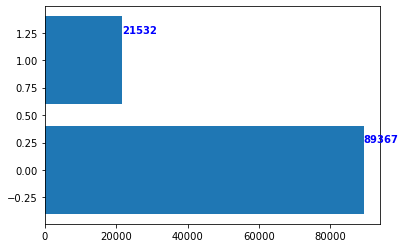

In [16]:

import matplotlib.pyplot as plt
b = [0, 1]
plt.barh(b,y.value_counts())
for i, v in enumerate(y.value_counts()):
    plt.text(v + 3, i + .25, str(v),
            color = 'blue', fontweight = 'bold')
plt.show()

In [18]:
'''from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
 
 
# get a list of models to evaluate
def get_models():
	models = list()
	models.append(LogisticRegression())
	models.append(RidgeClassifier())
	models.append(SGDClassifier())
	models.append(PassiveAggressiveClassifier())
	models.append(KNeighborsClassifier())
	models.append(DecisionTreeClassifier())
	models.append(ExtraTreeClassifier())
	models.append(LinearSVC())
	models.append(SVC())
	models.append(GaussianNB())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier())
	models.append(RandomForestClassifier())
	models.append(ExtraTreesClassifier())
	models.append(GaussianProcessClassifier())
	models.append(GradientBoostingClassifier())
	models.append(LinearDiscriminantAnalysis())
	models.append(QuadraticDiscriminantAnalysis())
	return models
 
# evaluate the model using a given test condition
def evaluate_model(cv, model):
	# get the dataset
	
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return mean(scores)
 
# define test conditions

cv = KFold(n_splits=10, shuffle=True, random_state=1)
# get the list of models to consider
models = get_models()
# collect results
ideal_results, cv_results = list(), list()
# evaluate each model
for model in models:
	# evaluate model using each test condition
	cv_mean = evaluate_model(cv, model)
	ideal_mean = evaluate_model(ideal_cv, model)
	# check for invalid results
	if isnan(cv_mean) or isnan(ideal_mean):
		continue
	# store results
	cv_results.append(cv_mean)
	ideal_results.append(ideal_mean)
	# summarize progress
	print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))
# calculate the correlation between each test condition
corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)
# scatter plot of results
pyplot.scatter(cv_results, ideal_results)
# plot the line of best fit
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.plot(cv_results, line, color='r')
# label the plot
pyplot.title('10-fold CV vs LOOCV Mean Accuracy')
pyplot.xlabel('Mean Accuracy (10-fold CV)')
pyplot.ylabel('Mean Accuracy (LOOCV)')
# show the plot
pyplot.show()
    '''

"from numpy import mean\nfrom numpy import isnan\nfrom numpy import asarray\nfrom numpy import polyfit\nfrom scipy.stats import pearsonr\nfrom matplotlib import pyplot\nfrom sklearn.datasets import make_classification\nfrom sklearn.model_selection import KFold\nfrom sklearn.model_selection import LeaveOneOut\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.linear_model import RidgeClassifier\nfrom sklearn.linear_model import SGDClassifier\nfrom sklearn.linear_model import PassiveAggressiveClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.tree import ExtraTreeClassifier\nfrom sklearn.svm import LinearSVC\nfrom sklearn.svm import SVC\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.ensemble import AdaBoostClassifier\nfrom sklearn.ensemble import BaggingClassifier\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.ensem

In [19]:
#cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [18]:
X_train , X_val , y_train , y_val = tts(X,y, test_size = 0.2 , random_state = 0)

In [19]:
oversample = RandomOverSampler(sampling_strategy='minority')
counter = Counter(y)
print(counter)

X_over, y_over = oversample.fit_resample(X_train, y_train)
counter = Counter(y_over)
print(counter)

Counter({0: 89367, 1: 21532})
Counter({0: 71543, 1: 71543})


In [20]:


from sklearn.ensemble import RandomForestClassifier
clf =RandomForestClassifier()
#n_estimators = 150 ,criterion = 'gini' , max_depth = 30
clf.fit(X_over , y_over)

RandomForestClassifier()

In [30]:
pred = clf.predict_proba(X_val)
pred1 = pred[:,1]
for i in range(len(pred1)):
    if(pred1[i]>0.5):
        pred1[i] = int(1)
    else:
        pred1[i]=int(0)
pred1 = pred1.astype(int)
pred1[0:5]

array([0, 0, 0, 0, 0])

In [31]:
pred1.sum()

1178

In [32]:
pred = pred1

In [33]:
from sklearn import metrics
def roc_auc(predictions,target):
    '''
    This methods returns the AUC Score when given the Predictions
    and Labels
    '''
    
    fpr, tpr, thresholds = metrics.roc_curve(target, predictions)
    roc_auc = metrics.auc(fpr, tpr)
    return roc_auc

In [34]:
roc_auc(pred,y_val)

0.5927934220201031

accuracy for RandomForest: 0.8299368800721371


<AxesSubplot:>

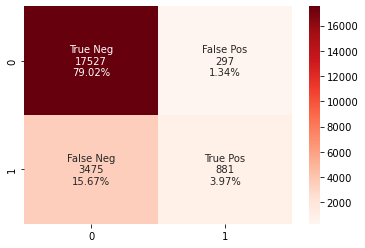

In [35]:
from sklearn.metrics import accuracy_score ,confusion_matrix
print('accuracy for RandomForest: {}'.format(accuracy_score(y_val , pred)))
cm_rf = confusion_matrix(y_val, pred)

group_names =['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_rf.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_rf.flatten()/np.sum(cm_rf)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm_rf, annot=labels, fmt='', cmap='Reds')

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred, target_names=['class0' , 'class1']))

              precision    recall  f1-score   support

      class0       0.83      0.98      0.90     17824
      class1       0.75      0.20      0.32      4356

    accuracy                           0.83     22180
   macro avg       0.79      0.59      0.61     22180
weighted avg       0.82      0.83      0.79     22180



In [37]:
pred = clf.predict_proba(X_test)
pred1 = pred[:,1]
for i in range(len(pred1)):
    if(pred1[i]>0.5):
        pred1[i] = int(1)
    else:
        pred1[i]=int(0)
pred1 = pred1.astype(int)
pred = pred1.copy()
pred[0:5]

array([0, 0, 0, 0, 0])

In [38]:
#train_pred = clf.predict(X_train)
#accuracy_score(y_train , train_pred)
from sklearn.metrics import accuracy_score ,confusion_matrix
train_pred = clf.predict(X)
accuracy_score(y , train_pred)



0.965987069315323

In [42]:

sub = pd.DataFrame()
sub['id'] = ids
sub['TARGET'] = pred
sub.to_csv('Submission.csv' , index = False)
sub

,id,TARGET
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
110894,110894,0
110895,110895,0
110896,110896,0
110897,110897,0


In [43]:
sub.TARGET.sum()

10829